In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [70]:
sp=pd.read_csv('C:\\Users\\91735\\Downloads\\StudentsPerformance.csv')
sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


# 1. Find out how many males and females participated in the test.


In [71]:
sp1=sp.groupby('gender')['gender'].count().reset_index(name='count')
sp1

,gender,count
0,female,518
1,male,482


# 2. What do you think about the students' parental level of education?

In [72]:
sp2=sp.groupby('parental level of education')['parental level of education'].count().reset_index(name='count') # displays count based on parental level of education
sp2.rename(columns={'parental level of education':'Parental_level_of_education'}, inplace=True)
sp2

,Parental_level_of_education,count
0,associate's degree,222
1,bachelor's degree,118
2,high school,196
3,master's degree,59
4,some college,226
5,some high school,179


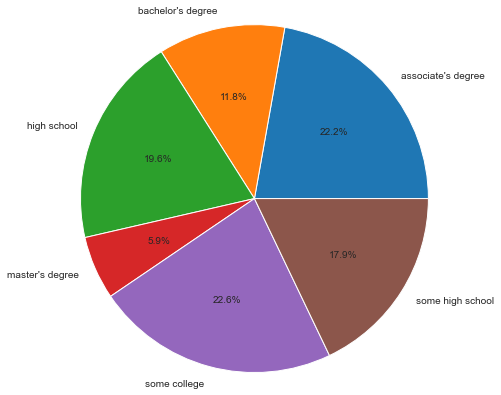

In [73]:
plt.pie(data=sp2, x="count",labels='Parental_level_of_education', autopct = '%0.1f%%', radius=2)
plt.show()

# 3. Who scores the most on average for math, reading and writing based on

# ● Gender

In [74]:
print('\033[1m The average score on each subject based on gender \033[0m')
sp1=sp.groupby('gender').mean()
sp1

 The average score on each subject based on gender 


,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [75]:
sp2=sp1.mean(axis=1)
sp2=sp2.nlargest(1)
print('The most score is by:',sp2)

The most score is by: gender
female    69.478121
dtype: float64


Text(0, 0.5, 'avg')

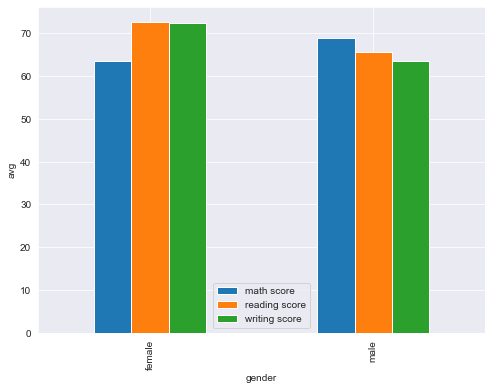

In [76]:
sns.set_style("darkgrid")
sp2=sp.groupby('gender')[['math score','reading score','writing score']].mean().plot(kind='bar',figsize=(8,6))
plt.ylabel('avg')

In all the 3 scores female is having the highest

# ● Test preparation course

In [77]:
print('\033[1m The average score on each subject based on test preparation \033[0m')
sp3=sp.groupby('test preparation course').mean()
sp3

 The average score on each subject based on test preparation 


,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


In [83]:
sp4=sp3.mean(axis=1)
sp4=sp4.nlargest(1)
print('The most scored is by:',sp4)

The most scored is by: test preparation course
completed    72.942272
dtype: float64


Text(0, 0.5, 'avg')

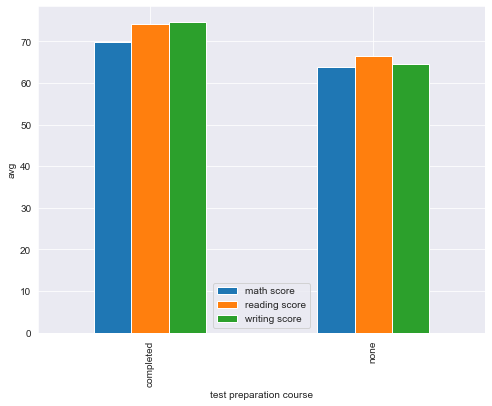

In [79]:
sp4=sp3.groupby('test preparation course')[['math score','reading score','writing score']].mean().plot(kind='bar',figsize=(8,6))
plt.ylabel('avg')

In all the 3 scores completed category in test preparation has the highest mean.

# 4. What do you think about the scoring variation for math, reading and writing based on

# ● Gender

In [80]:
print('\033[1m The standard deviation of each score based on gender \033[0m')
sp1=sp.groupby('gender').std()
sp1

 The standard deviation of each score based on gender 


,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


The std deviation for male is less compared to female.
Which means the marks scored by male is more consistent than female.

# ● Test preparation course

In [81]:
print('\033[1m The standard deviation of each score based on test preparation \033[0m')
sp2=sp.groupby('test preparation course').std()
sp2

 The standard deviation of each score based on test preparation 


,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


The std deviation of all 3 scores in completed is less compared to none.
Which means the marks scored under completed category is more consistent.

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [82]:
sp1=sp.nlargest(250,['math score'])
sp1
##From this we get the top 25%(which is 250 students)students scored in maths

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64


we got the top 250 students who scored highest in maths ,so the management can give bonus to these students